In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("credit_risk/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [7]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [8]:
# a scaler might help

corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


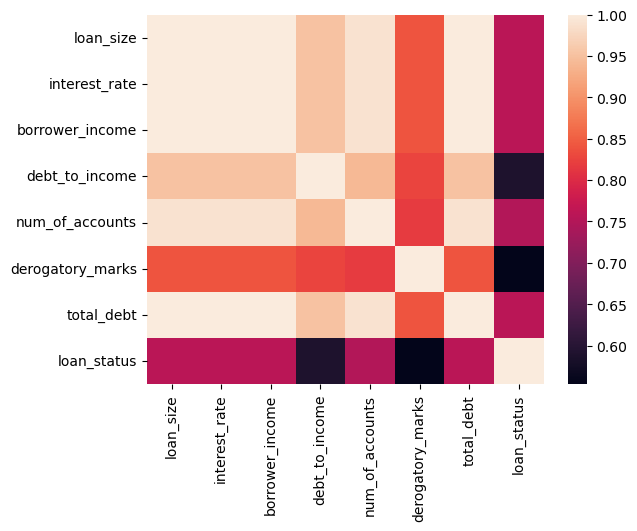

In [9]:
sns.heatmap(corrs)
plt.show()

In [10]:
# there's a LOT of multicollinearity

In [11]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [12]:
# HUGE imbalance - most people do NOT default on their loan

In [13]:
2500/77536 # 97% DON'T default

0.03224308708212959

In [ ]:

Step 2: Create the labels set (y) from the “loan_status” column, and then create the features (X) DataFrame from the remaining columns.


In [14]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df.drop("loan_status", axis=1) # keep ALL features except for the target

In [15]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [16]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [ ]:
Step 3: Split the data into training and testing datasets by using train_test_split


In [17]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(58152, 7)
(19384, 7)


In [ ]:
Create a Logistic Regression Model with the Original Data



In [19]:
# We built this in class with my amazing Prof :)
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Step 1: Fit a logistic regression model by using the training data (X_train and y_train).


In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(random_state=1)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [21]:
# Make a prediction using the testing data
# predict
train_preds = lr.predict(X_train)
train_probs = lr.predict_proba(X_train)

test_preds = lr.predict(X_test)
test_probs = lr.predict_proba(X_test)

In [ ]:
Step 3: Evaluate the model’s performance by doing the following:

    Generate a confusion matrix.

    Print the classification report.



TRAINING METRICS

Train Confusion Matrix: 
[[55987   284]
 [  127  1754]]

Train Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.93      0.90      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.96      0.95     58152
weighted avg       0.99      0.99      0.99     58152





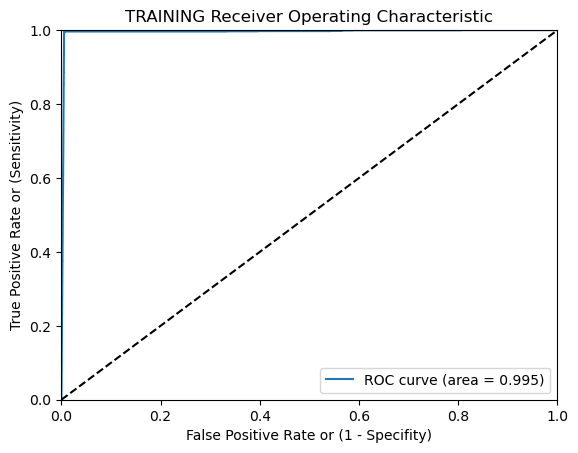



TESTING METRICS

Test Confusion Matrix: 
[[18655   110]
 [   36   583]]

Test Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384





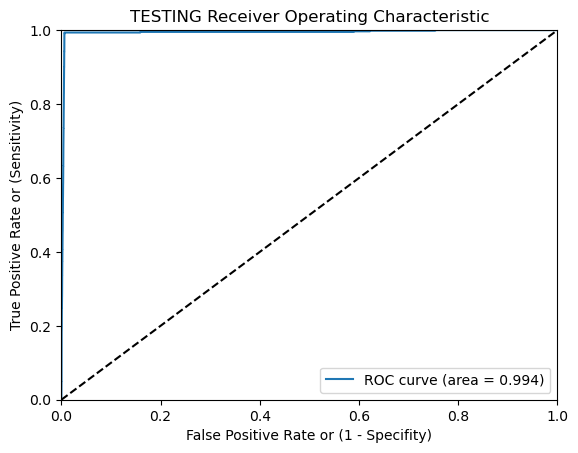

In [22]:
# Generate a confusion matrix for the model
# Print the classification report for the model

# evaluate train
train_cr = classification_report(y_train, train_preds)
train_cm = confusion_matrix(y_train, train_preds)

train_report = f"""
Train Confusion Matrix: 
{train_cm}

Train Report: 
{train_cr}
"""
print("TRAINING METRICS")
print(train_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
roc_auc = roc_auc_score(y_train, train_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TRAINING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print()
print()

# evaluate test
test_cr = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)

test_report = f"""
Test Confusion Matrix: 
{test_cm}

Test Report: 
{test_cr}
"""
print("TESTING METRICS")
print(test_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
roc_auc = roc_auc_score(y_test, test_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TESTING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

TRAINING METRICS

    Train Confusion Matrix: 
    [[55969   302]
 [   14  1867]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.99      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



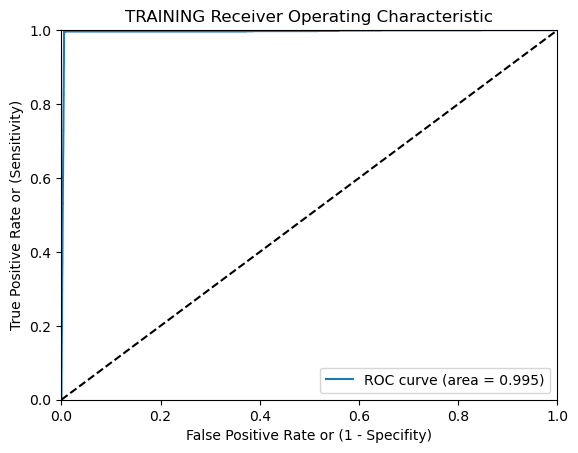



TESTING METRICS

    Test Confusion Matrix: 
    [[18651   114]
 [    6   613]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



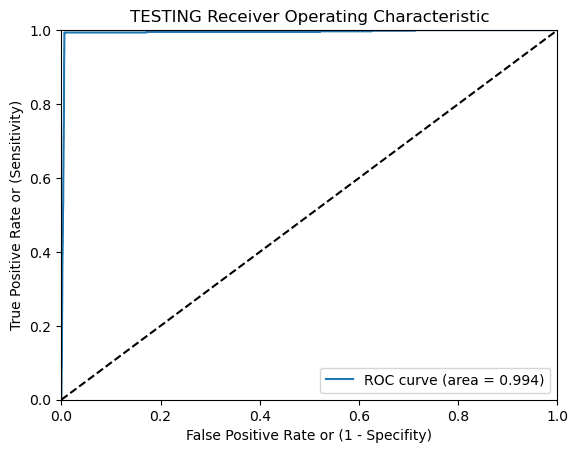

In [23]:
# initialize
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

In [24]:
# no overfitting
# LOVE the reduction in false negatives
# but did increase false positive

TRAINING METRICS

    Train Confusion Matrix: 
    [[55970   301]
 [   11  1870]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.99      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



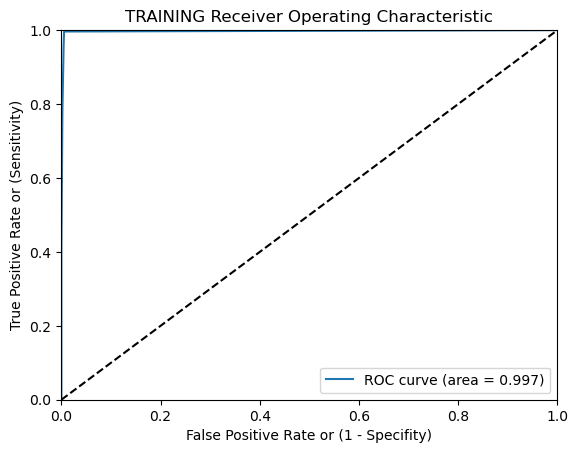



TESTING METRICS

    Test Confusion Matrix: 
    [[18649   116]
 [    5   614]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



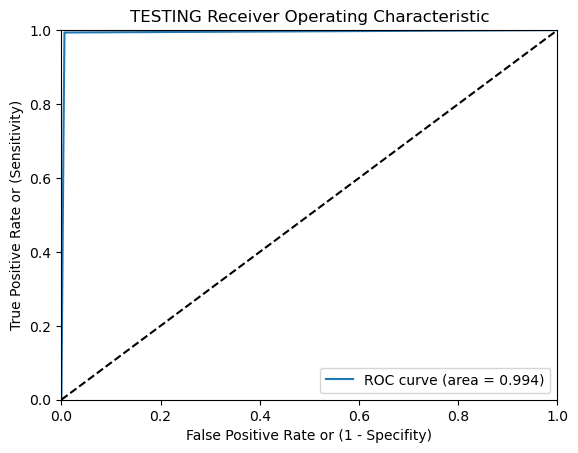

In [26]:
# initialize
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

In [27]:
# no overfitting
# ALSO reduces false negatives
# but does have a chunk of false positives
# Easier to explain, and less computationally heavy vs the SVC, so this is now my model to beat

TRAINING METRICS

    Train Confusion Matrix: 
    [[56206    65]
 [   78  1803]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.97      0.96      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.98      0.98      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    



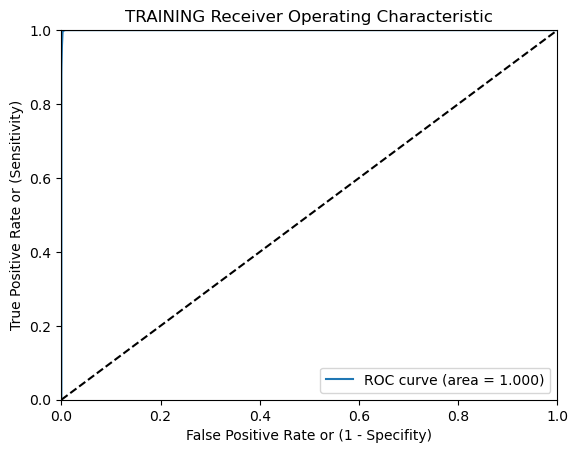



TESTING METRICS

    Test Confusion Matrix: 
    [[18668    97]
 [   91   528]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    



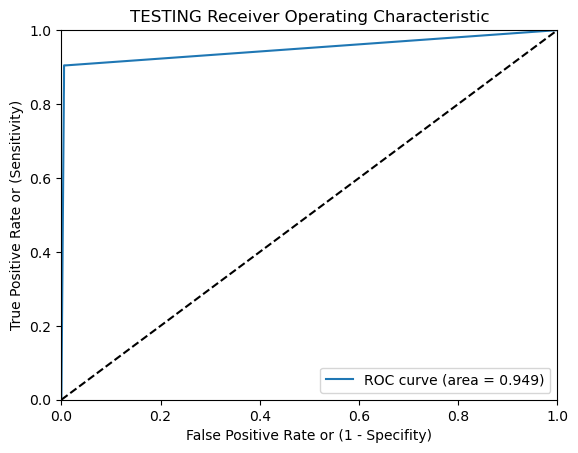

In [28]:
# initialize
dt = DecisionTreeClassifier(random_state=42)

# fit
dt.fit(X_train, y_train)

doClassification(dt, X_train, X_test, y_train, y_test)

In [29]:
# There's signs of overfitting
# all metrics are worse than KNN :(

TRAINING METRICS

    Train Confusion Matrix: 
    [[56155   116]
 [   28  1853]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.94      0.99      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    



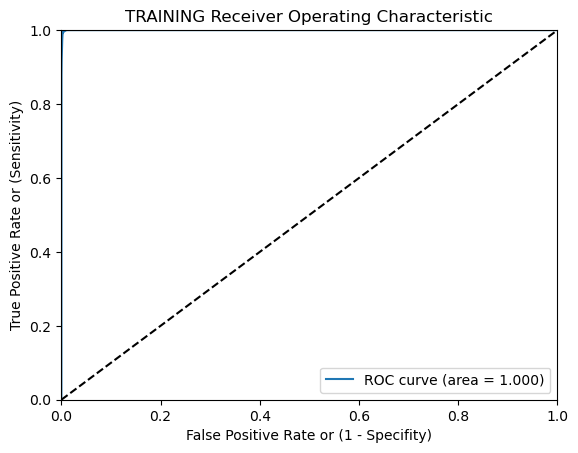



TESTING METRICS

    Test Confusion Matrix: 
    [[18666    99]
 [   64   555]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384

    



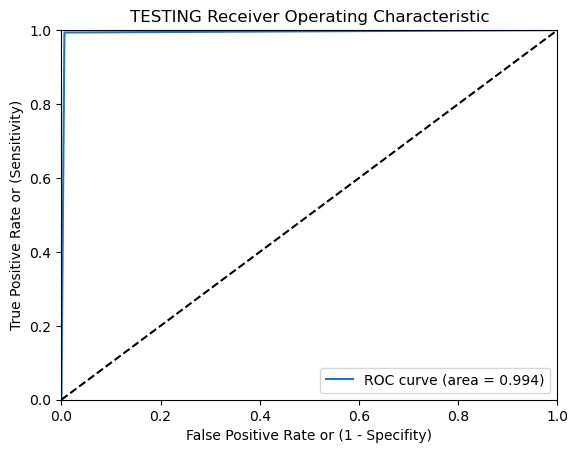

In [30]:
# initialize
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train, y_train)

doClassification(rf, X_train, X_test, y_train, y_test)

In [31]:
# A bit of overfitting (we're better on the train than the test)
# Recall is WORSE than the KNN

TRAINING METRICS

    Train Confusion Matrix: 
    [[55967   304]
 [    9  1872]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      1.00      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



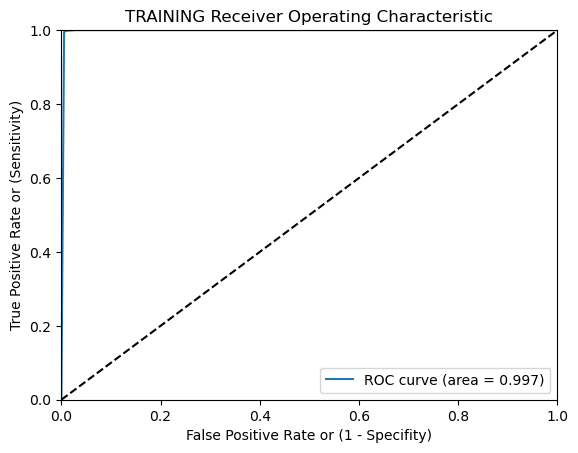



TESTING METRICS

    Test Confusion Matrix: 
    [[18650   115]
 [    4   615]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



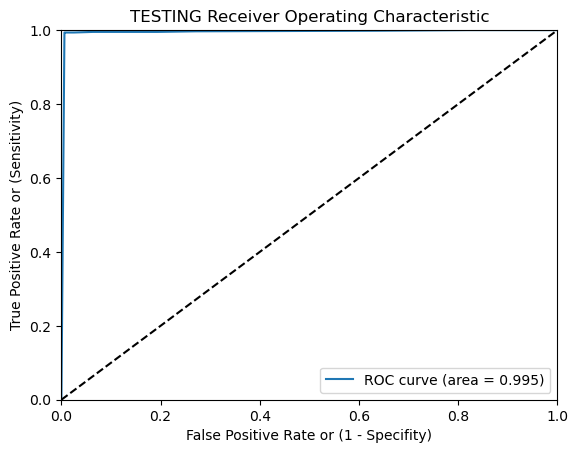

In [32]:
# initialize
ada = AdaBoostClassifier(random_state=42)

# fit
ada.fit(X_train, y_train)

doClassification(ada, X_train, X_test, y_train, y_test)

In [33]:
# NO overfitting
# barely better than the KNN (luck?)
# But, I like tree models in prod, so this is now my model to beat

TRAINING METRICS

    Train Confusion Matrix: 
    [[55980   291]
 [    8  1873]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.87      1.00      0.93      1881

    accuracy                           0.99     58152
   macro avg       0.93      1.00      0.96     58152
weighted avg       1.00      0.99      1.00     58152

    



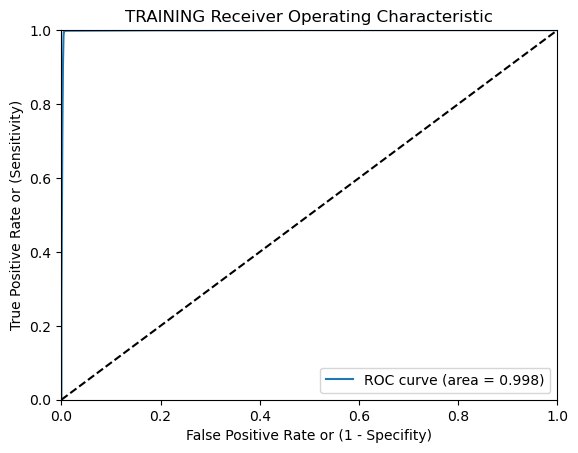



TESTING METRICS

    Test Confusion Matrix: 
    [[18652   113]
 [    6   613]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



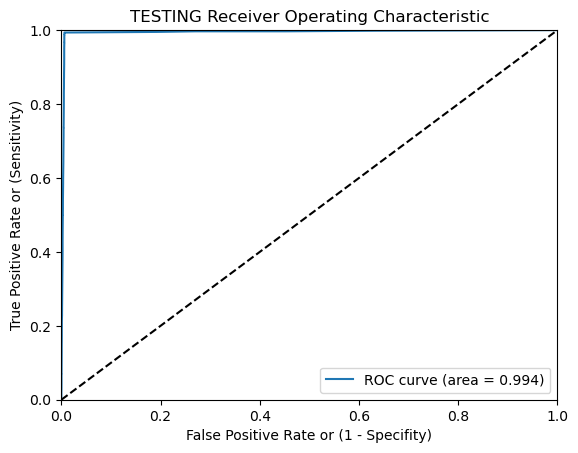

In [34]:
# initialize
gb = GradientBoostingClassifier(random_state=42)

# fit
gb.fit(X_train, y_train)

doClassification(gb, X_train, X_test, y_train, y_test)

In [35]:
# no signs of overfitting
# about the same performance as ADA

In [ ]:
# So in summary, either AdaBoost, GradientBoost, or Knn is good

# Knn is most explainable
# Ada/Gradient is probably the most adaptable 
# idk, follow your heart

In [36]:
fi = pd.DataFrame(zip(X.columns, gb.feature_importances_), columns=["feature", "importance"])
fi.sort_values(by="importance", ascending=False)

,feature,importance
1,interest_rate,0.848580
2,borrower_income,0.084580
0,loan_size,0.046022
6,total_debt,0.013919
3,debt_to_income,0.006765
4,num_of_accounts,0.000134
5,derogatory_marks,0.000000


In [37]:
# I like the distribution of feature importances in the GB model, so that's probably what I would roll with